# <font color = 'royalblue'> <center> Homework: *State Your Assumptions*

### Get the Data

In [1]:
# load packages
from dvc.api import read,get_url
import pandas as pd
import re

# store text file
txt = read('resources/data/shakespeare/shakespeare.txt', 
           repo='https://github.com/TLP-COI/text-data-course')

# view
print(txt[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



### Part 1

Split the text file into a table, such that

- each row is a single line of dialogue
- there are columns for
    - the speaker
    - the line number
    - the line dialogue (the text)

Hint: you will need to use RegEx to do this rapidly. See the in-class "markdown" example!

Question(s):

What assumptions have you made about the text that allowed you to do this?

___

#### <center> Method 1 - writing a RegEx pattern

Assumptions:
- The speaker name always starts with a capital letter
- Speaker names are always followed by a colon, 
- Speaker names are always followed by a line break after the colon.
- The dialogue is always between 'speaker name:\n' and a double line break (\n\n)

In [2]:
# write regex pattern
patt = re.compile(
    # use a non-capturing group to find the start of text file or a double line break
    "(?:\A|\n\n)"  
    # match speaker names i.e. first letter of the first word/name should be capital and there should be a colon at the end
    "(^[A-Z][\w ]+):$"  
    # go to the next line, match any character (including line breaks) and stop searching when condition is satisfied
    "\n([\s\S]+?)"  
    # match till two line breaks or the end of the file
    "(?=\n\n|\Z)", 
    # enable the pattern to handle an input string that consists of multiple lines
    flags=re.M
)

In [3]:
# store matches
matches = patt.findall(txt)

# store matches in dataframe
df1 = pd.DataFrame.from_records(matches, columns=['speaker', 'dialogue'])

# add line number column starting from 1
df1['line_number'] = df1.index + 1

# view dataframe
df1.head()

,speaker,dialogue,line_number
0,First Citizen,"Before we proceed any further, hear me speak.",1
1,All,"Speak, speak.",2
2,First Citizen,You are all resolved rather to die than to fam...,3
3,All,Resolved. resolved.,4
4,First Citizen,"First, you know Caius Marcius is chief enemy t...",5


I also tried the following, but realized that one of my assumptions (#2) was incorrect as there were speakers called 'Ghosts of young Princes' and 'Ghost of GREY'

Assumptions:
1. The speaker name always starts with a capital letter.
2. If there is more than one word making up a speaker name e.g. First Citizen, all words start with a capital letter.
3. Speaker names are always followed by a colon.
4. Speaker names are always followed by a line break after the colon.
5. The dialogue is always after 'speaker name:\n'

`([A-Z][\w-]*(\s+[A-Z][\w-]*)+)(?=[:$][\r\n])` tried this in https://regexr.com/

#### <center> Method 2 - using the split function from re

The text is structured as follows:

*First Speaker:*\n*Text*\n\n*Next Speaker*

Assumptions:
- the speaker's name is always followed by a colon and a line break
- the text (speaker's dialogue) comes after the colon and line break (after the speaker's name) and ends with double line breaks (/n/n)

**Extract each dialogue spoken and the speaker's name i.e. 'speaker_name:\ndialogue'**

In [4]:
# split on double line breaks
first_split = re.split("\n\n", txt)

# check length of list
len(first_split)

7222

**Separate speaker name and the dialogue**

Assumption:<br>
Speaker name is always followed by a colon. <br>
Since each item in `first_split` contains the speaker's name and the dialogue spoken, splitting on the *first* colon in the string will separate the speaker name and the dialogue.

In [5]:
# create list to store split results
second_split = []

# iterate through each item in the list and split on the first colon
for line in first_split:
    second_split.append(line.split(":", 1))
    
# check length of list
len(second_split)

7222

#### Store speakers and dialogues

In [6]:
# create list to store speakers
speakers = []

# iterate through each item in the list and select the speakers
for line in range(len(second_split)):
    speakers.append(second_split[line][0])
    
# create list to store speakers
speakers_1 = []

# remove \n from speakers
for i in range(len(speakers)):
    speakers_1.append(speakers[i].replace('\n',''))

In [7]:
# create list to store dialogues
dialogues = []

# iterate through each item in the list and select the dialogues
for line in range(len(second_split)):
    dialogues.append(second_split[line][1])
    
# create list to store dialogues
dialogues_1 = []

# remove \n from dialogues
for i in range(len(dialogues)):
    dialogues_1.append(dialogues[i].replace('\n',' '))

In [8]:
# create empty dataframe
df = pd.DataFrame()

# store speakers and dialogues in dataframe
df['speaker']  = speakers_1
df['dialogue'] = dialogues_1

# add line number column starting from 1
df['line_number'] = df.index + 1

# view df
df.head()

,speaker,dialogue,line_number
0,First Citizen,"Before we proceed any further, hear me speak.",1
1,All,"Speak, speak.",2
2,First Citizen,You are all resolved rather to die than to fa...,3
3,All,Resolved. resolved.,4
4,First Citizen,"First, you know Caius Marcius is chief enemy ...",5


### Part 2

You have likely noticed that the lines are not all from the same play! Now, we will add some useful metadata to our table:

- Determine a likely source title for each line
- add the title as a 'play' column in the data table.
- make sure to document your decisions, assumptions, external data sources, etc.

This is fairly open-ended, and you are not being judged completely on accuracy. Instead, think outside the box a bit as to how you might accomplish this, and attempt to justify whatever approximations or assumptions you felt were appropriate.
___

For the source title, I am going to use a Kaggle dataset (https://www.kaggle.com/kingburrito666/shakespeare-plays/version/4) on Shakespeare's plays (including character names and dialogues). 

In [9]:
# read in Shakespeare play data
df_shakespeare = pd.read_csv('Shakespeare_data.csv')

# view
df_shakespeare.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [10]:
# make speaker names uppercase (in order to match) and store in df
speaker_df = pd.DataFrame(df['speaker'].str.upper())
df_shakespeare['Player'] = df_shakespeare['Player'].str.upper()

# rename column to match shakespeare_df column name for speakers
speaker_df.rename(columns = {'speaker':'Player'}, inplace = True)

I will get the list of plays of a specific speaker e.g. all plays with the speaker 'First Citizen'. Then I will select the most common play from this list as the source title/play. The assumption here is that the play in which a specific speaker/character had a lot of dialogues is the most likely source title for the dialogues by the speaker.  

Limitation of this assumption: some dialogues may be from plays where the speaker has a minor part i.e. it may not be the most common play. 

In [11]:
# create empty list to store source titles
plays = []

# store the most common play for each speaker
for i in range(len(speaker_df)):
    plays_list = list(df_shakespeare.loc[df_shakespeare['Player'] == speaker_df.Player[i], 'Play'])
    if len(plays_list) == 0:
        plays.append('none')
    else:
        plays.append(max(set(plays_list), key = plays_list.count))
    
# check length of plays
len(plays)

7222

In [12]:
# add 'play' column 
df['play'] = plays

# view dataframe
df.head()

,speaker,dialogue,line_number,play
0,First Citizen,"Before we proceed any further, hear me speak.",1,Coriolanus
1,All,"Speak, speak.",2,macbeth
2,First Citizen,You are all resolved rather to die than to fa...,3,Coriolanus
3,All,Resolved. resolved.,4,macbeth
4,First Citizen,"First, you know Caius Marcius is chief enemy ...",5,Coriolanus


In [13]:
# view rows where there was no match 
df[df['play'] == 'none']

,speaker,dialogue,line_number,play
530,"Senators, &C",We'll surety him.,531,none
538,"Senators, &C","Weapons, weapons, weapons! 'Tribunes!' 'Patri...",539,none
2142,Ghost of Prince Edward,,2143,none
2143,Ghost of King Henry VI,,2144,none
2150,Ghosts of young Princes,,2151,none
2152,Ghost of BUCKINGHAM,,2153,none
6569,ALL SERVING-MEN,"Here, here, sir; here, sir.",6570,none


Assumption: for speakers that were not found in the external dataset and for which there is no play information, the speaker is assumed to be in the same play as the previous speaker. In other words: for rows where there was not an exact match for a speaker, the preceding row will be used to obtain the play/source title. 

Limitation: if the play for the first observation was missing, this would have to be modified. 

In [14]:
# condition: select rows where no play was found
# replace with play in the previous row
s = df["play"].eq("none")
df.loc[s, "play"] = pd.np.nan
df["play"].ffill(inplace=True)

# check - should not return any matches
df[df['play'] == 'none']

C:\Users\marya\AppData\Local\Temp/ipykernel_16980/1585223887.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.loc[s, "play"] = pd.np.nan


,speaker,dialogue,line_number,play


### Part 3

Pick one or more of the techniques described in this chapter:

- keyword frequency
- entity relationships
- markov language model
- bag-of-words, TF-IDF
- semantic embedding

make a case for a technique to measure how important or interesting a speaker is. The measure does not have to be both important and interesting, and you are welcome to come up with another term that represents "useful content", or tells a story (happiest speaker, worst speaker, etc.)

Whatever you choose, you must
- document how your technique was applied
- describe why you believe the technique is a valid approximation or exploration of how important, interesting, etc., a speaker is.
- list some possible weaknesses of your method, or ways you expect your assumptions could be violated within the text.

This is mostly about learning to transparently document your decisions, and iterate on a method for operationalizing useful analyses on text. Your explanations should be understandable; homeworks will be peer-reviewed by your fellow students

___

Starting by asking very basic questions.

### 1

**How many dialogues did each speaker have?**

Assumption: the more dialogues a speaker has, the more important the speaker is.

Limitations:
- the corpus that we have may not be representative of all plays by Shakespeare. This means that the character that has the most dialogues may just be a charater from play(s) that are over-represented in the corpus compared to other plays. 
- Some characters appear in multiple plays and therefore may have a lot of dialogues. However, *within* a certain play, they many not be the most important speakers i.e. have the most dialogues.

In [15]:
# convert speaker and play columns to uppercase 
df['speaker'] = df['speaker'].str.upper()
df['play'] = df['play'].str.upper()

In [16]:
# view speakers and dialogue counts
df['speaker'].value_counts().rename_axis('speaker').reset_index(name='total_dialogues').head()

,speaker,total_dialogues
0,GLOUCESTER,229
1,DUKE VINCENTIO,193
2,ROMEO,163
3,MENENIUS,162
4,PETRUCHIO,158


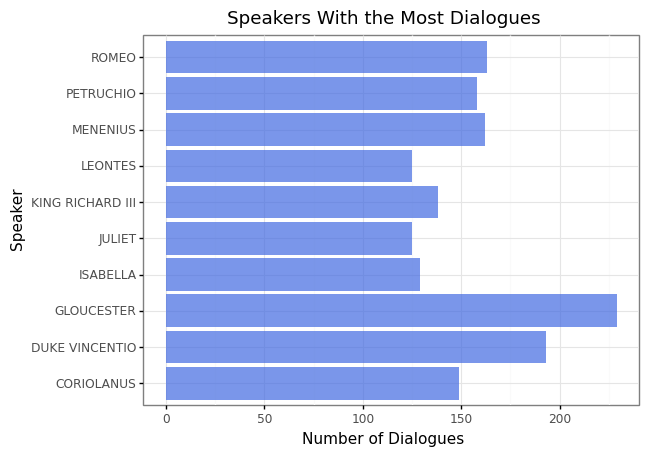

<ggplot: (132688838647)>

In [17]:
# plot the top 10 most important speakers
from plotnine import *

(ggplot(df['speaker'].value_counts().rename_axis('speaker').reset_index(name='total_dialogues')[:10],
        aes(x = "speaker",
            y = "total_dialogues")) +
 geom_bar(stat = "identity",
         fill = 'royalblue',
         alpha = 0.7) +
 coord_flip()+
 theme_bw() +
 labs(title = "Speakers With the Most Dialogues",
      caption = 'The lower the polarity score the more negative the speaker',
     y = 'Number of Dialogues',
     x = 'Speaker')
)

### 2

**What was the proportion of dialogues spoken by each speaker (in each play)?**

Assumption: the relative number of dialogues spoken determines speaker importance e.g. if a speaker has more dialogues compared to other speakers in a play, then that speaker is important. 

Limitations: 
- a speaker may have a lot of dialogues but still not be the 'main character' around which the story revolves (assuming characters at the center of the story have the most dialogues and are the most important.

In [18]:
# group by play and speaker and create separate columns for each dialogue.
df_prop = df.groupby(['play', 'speaker', 'dialogue']).size().unstack(fill_value=0)

#view
df_prop.head()

dialogue                      \
play           speaker         
A WINTERS TALE ANTIGONUS   1   
               ARCHIDAMUS  0   
               AUTOLYCUS   5   
               CAMILLO     1   
               CLEOMENES   0   

dialogue                    'Alla nostra casa ben venuto, molto honorato signor mio Petruchio.' Rise, Grumio, rise: we will compound this quarrel.  \
play           speaker                                                                                                                               
A WINTERS TALE ANTIGONUS                                                   0                                                                         
               ARCHIDAMUS                                                  0                                                                         
               AUTOLYCUS                                                   0                                                                         
               CAMILLO                                                     0                                                                         
               CLEOMENES                                                   0                                                                         

dialogue                    'Cucullus non facit monachum:' honest in nothing but in his clothes; and one that hath spoke most villanous speeches of the duke.  \
play           speaker                                                                                                                                          
A WINTERS TALE ANTIGONUS                                                   0                                                                                    
               ARCHIDAMUS                                                  0                                                                                    
               AUTOLYCUS                                                   0                                                                                    
               CAMILLO                                                     0                                                                                    
               CLEOMENES                                                   0                                                                                    

dialogue                    'Fair cousin'? I am greater than a king: For when I was a king, my flatterers Were then but subjects; being now a subject, I have a king here to my flatterer. Being so great, I have no need to beg.  \
play           speaker                                                                                                                                                                                                              
A WINTERS TALE ANTIGONUS                                                   0                                                                                                                                                        
               ARCHIDAMUS                                                  0                                                                                                                                                        
               AUTOLYCUS                                                   0                                                                                                                                                        
               CAMILLO                                                     0                                                                                                                                                        
               CLEOMENES                                                   0                                                                                                                                                  

In [19]:
# store list of columns and only keep columns that are dialogues
column_list = list(df_prop)
column_list = column_list[1:]

In [20]:
# create column to store total number of dialogues by each speaker in each play
df_prop["sum"] = df_prop[column_list].sum(axis=1)

# view
df_prop.head()

dialogue                      \
play           speaker         
A WINTERS TALE ANTIGONUS   1   
               ARCHIDAMUS  0   
               AUTOLYCUS   5   
               CAMILLO     1   
               CLEOMENES   0   

dialogue                    'Alla nostra casa ben venuto, molto honorato signor mio Petruchio.' Rise, Grumio, rise: we will compound this quarrel.  \
play           speaker                                                                                                                               
A WINTERS TALE ANTIGONUS                                                   0                                                                         
               ARCHIDAMUS                                                  0                                                                         
               AUTOLYCUS                                                   0                                                                         
               CAMILLO                                                     0                                                                         
               CLEOMENES                                                   0                                                                         

dialogue                    'Cucullus non facit monachum:' honest in nothing but in his clothes; and one that hath spoke most villanous speeches of the duke.  \
play           speaker                                                                                                                                          
A WINTERS TALE ANTIGONUS                                                   0                                                                                    
               ARCHIDAMUS                                                  0                                                                                    
               AUTOLYCUS                                                   0                                                                                    
               CAMILLO                                                     0                                                                                    
               CLEOMENES                                                   0                                                                                    

dialogue                    'Fair cousin'? I am greater than a king: For when I was a king, my flatterers Were then but subjects; being now a subject, I have a king here to my flatterer. Being so great, I have no need to beg.  \
play           speaker                                                                                                                                                                                                              
A WINTERS TALE ANTIGONUS                                                   0                                                                                                                                                        
               ARCHIDAMUS                                                  0                                                                                                                                                        
               AUTOLYCUS                                                   0                                                                                                                                                        
               CAMILLO                                                     0                                                                                                                                                        
               CLEOMENES                                                   0                                                                                                                                                  

In [21]:
# reset index
df_prop = df_prop.reset_index()

Let's pick a specific play (A Winter's Tale) and see which speaker was the most important.

C:\Users\marya\AppData\Local\Temp/ipykernel_16980/3975652659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


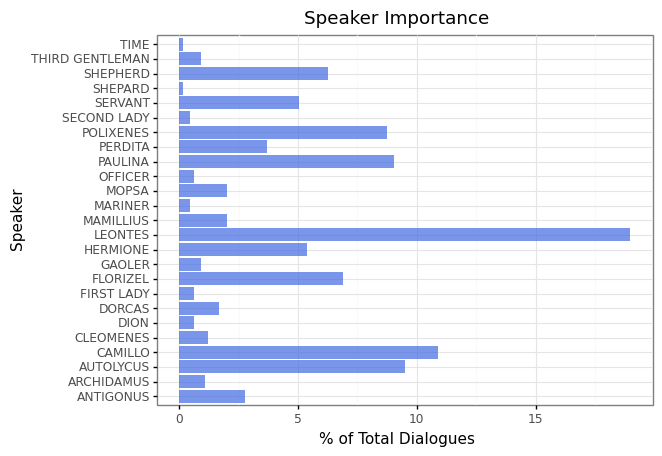

<ggplot: (132689357797)>

In [22]:
# select play
winters_tale_df = df_prop[df_prop['play'] == 'A WINTERS TALE']

# store percentage
winters_tale_df['percent'] = (winters_tale_df['sum'] / winters_tale_df['sum'].sum()) * 100

# plot 
(ggplot(winters_tale_df,
        aes(x="speaker",
            y="percent")) +
 geom_bar(stat = "identity",
         fill = 'royalblue',
         alpha = 0.7)+
 coord_flip()+
theme_bw() +
 labs(title = 'Speaker Importance',
     y = '% of Total Dialogues',
     x = 'Speaker')
)

Out of curiosity, who is Leontes?

"Leontes, the king of Sicilia, is **the protagonist of the play**. As the play opens, he is a happy man, blessed with a noble queen, Hermione; an affectionate childhood friend, Polixenes; a promising child Prince, Mamillius and loyal courtiers."<br>
http://pinkmonkey.com/booknotes/monkeynotes/pmWinters06.asp

### 3

**Which speakers are the most negative?**

Since a majority of Shakespeare's most famous plays are tragedies (https://www.thoughtco.com/plays-by-shakespeare-2985251), speakers who have more negative dialogues can be considered to be the most important ones.

Assumptions:
- Negative could mean sad/angry.
- Negative speakers are the most important. 

In [23]:
from textblob import TextBlob

In [24]:
# remove punctuation 
df['dialogue'] = df['dialogue'].str.replace("[^\w\s]", '')

# remove numbers (if any)
df["dialogue"] = df['dialogue'].str.replace('\d+', '')

# view 
df.head()


C:\Users\marya\AppData\Local\Temp/ipykernel_16980/3699126258.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\marya\AppData\Local\Temp/ipykernel_16980/3699126258.py:5: FutureWarning: The default value of regex will change from True to False in a future version.


,speaker,dialogue,line_number,play
0,FIRST CITIZEN,Before we proceed any further hear me speak,1,CORIOLANUS
1,ALL,Speak speak,2,MACBETH
2,FIRST CITIZEN,You are all resolved rather to die than to fa...,3,CORIOLANUS
3,ALL,Resolved resolved,4,MACBETH
4,FIRST CITIZEN,First you know Caius Marcius is chief enemy t...,5,CORIOLANUS


In [25]:
from nltk.corpus import stopwords

# store stopwords from nltk
nltk_sw = stopwords.words("english")

# remove stopwords from dialogues
df['dialogue'] = df['dialogue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nltk_sw)]))

# view
df.head()

,speaker,dialogue,line_number,play
0,FIRST CITIZEN,Before proceed hear speak,1,CORIOLANUS
1,ALL,Speak speak,2,MACBETH
2,FIRST CITIZEN,You resolved rather die famish,3,CORIOLANUS
3,ALL,Resolved resolved,4,MACBETH
4,FIRST CITIZEN,First know Caius Marcius chief enemy people,5,CORIOLANUS


In order to find out the sentiment of each dialogue, I will use TextBlob. 

In [26]:
# store dialogues 
dialogue_text = df['dialogue']

Use polarity scores to determine the sentiment of each dialogue. 

*The polarity score is a float within the range [-1.0, 1.0], where -1 is near to negative and 1 to positive. The next step would be to find the speakers with most negative dialogues.*

Assumptions:
- Each dialogue expresses only one sentiment.
- The average sentiment score of each of the evaluated tokens (i.e. words in a dialogue) is a good measure of the sentiment of the entire text (i.e. the dialogue).

Limitations:
- One dialogue can express more than one sentiment.

In [27]:
# store polarity scores in a list

polarity_scores = []

for i in dialogue_text:
    polarity_scores.append(TextBlob(i).sentiment[0])
    

In [28]:
# create copy of df
df_sentiment = df.copy()

# store TextBlob's polarity scores as a column 
df_sentiment['sentiment'] = polarity_scores

# view
df_sentiment.head()

,speaker,dialogue,line_number,play,sentiment
0,FIRST CITIZEN,Before proceed hear speak,1,CORIOLANUS,0.00
1,ALL,Speak speak,2,MACBETH,0.00
2,FIRST CITIZEN,You resolved rather die famish,3,CORIOLANUS,0.00
3,ALL,Resolved resolved,4,MACBETH,0.00
4,FIRST CITIZEN,First know Caius Marcius chief enemy people,5,CORIOLANUS,0.25


In [29]:
# group by speaker and find mean polarity scores
speaker_sentiment = df_sentiment.groupby('speaker', as_index=False)['sentiment'].mean()

# sort by sentiment column
speaker_sentiment.sort_values(["sentiment", "speaker"], ascending=True).head()

,speaker,sentiment
107,FRIAR JOHN,-0.528571
299,WESTMORELAND,-0.441667
87,FIRST HERALD,-0.400000
302,YOUNG MARCIUS,-0.333333
180,LOVEL,-0.300000


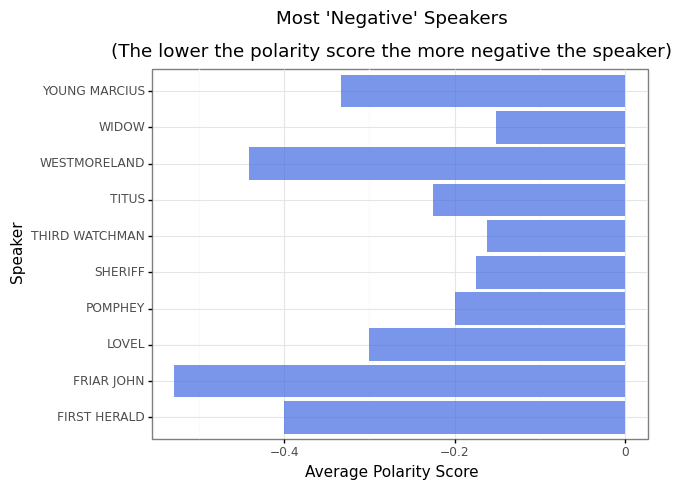

<ggplot: (132692603555)>

In [30]:
# plot the top 10 most negative speakers

(ggplot(speaker_sentiment.sort_values(["sentiment", "speaker"], ascending=True)[:10],
        aes(x = "speaker",
            y = "sentiment")) +
 geom_bar(stat = "identity",
         fill = 'royalblue',
         alpha = 0.7) +
 coord_flip()+
 theme_bw() +
 labs(title = "Most 'Negative' Speakers\n\n(The lower the polarity score the more negative the speaker)",
     y = 'Average Polarity Score',
     x = 'Speaker')
)

Just curious: The most negative speakers are Friar John and Westmoreland - who are they and why did they have a lot of negative dialogues?

"A Franciscan friar charged by Friar Lawrence with taking the news of Juliet's false death to Romeo in Mantua. Friar John is **held up in a quarantined house**, and the message never reaches Romeo."
https://www.sparknotes.com/shakespeare/romeojuliet/characters/

"The Earl of Westmorland is one of King Henry’s noblemen, who **helps to incite him to war** against France. He **despises traitors**..."<br>
https://www.playshakespeare.com/henry-v/characters/earl-of-westmorland#:~:text=The%20Earl%20of%20Westmorland%20is,of%20Henry%20IV%2C%20Part%20Two

Based on these character descriptions, both characters seem to be 'negative' in different ways - Friar John's dialogues are probably driven by sadness/depression, and Westmoreland's by anger?